In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sms_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)

sms_raw.columns = ['message', 'pos_or_neg']
print(sms_raw.head())

                                             message  pos_or_neg
0  So there is no way for me to plug it in here i...           0
1                        Good case, Excellent value.           1
2                             Great for the jawbone.           1
3  Tied to charger for conversations lasting more...           0
4                                  The mic is great.           1


In [3]:
keywords = ['excellent', 'great', 'winner', 'good', 'satisfied', 'impressed', 'best','pleased']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
print(sms_raw.head())

                                             message  pos_or_neg  excellent  \
0  So there is no way for me to plug it in here i...           0      False   
1                        Good case, Excellent value.           1       True   
2                             Great for the jawbone.           1      False   
3  Tied to charger for conversations lasting more...           0      False   
4                                  The mic is great.           1      False   

   great  winner   good  satisfied  impressed   best  pleased  
0  False   False  False      False      False  False    False  
1  False   False  False      False      False  False    False  
2  False   False  False      False      False  False    False  
3  False   False  False      False      False  False    False  
4  False   False  False      False      False  False    False  


In [4]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()
print(sms_raw)

                                               message  pos_or_neg  excellent  \
0    So there is no way for me to plug it in here i...           0      False   
1                          Good case, Excellent value.           1       True   
2                               Great for the jawbone.           1      False   
3    Tied to charger for conversations lasting more...           0      False   
4                                    The mic is great.           1      False   
5    I have to jiggle the plug to get it to line up...           0      False   
6    If you have several dozen or several hundred c...           0      False   
7          If you are Razr owner...you must have this!           1      False   
8                  Needless to say, I wasted my money.           0      False   
9                     What a waste of money and time!.           0      False   
10                     And the sound quality is great.           1      False   
11   He was very impressed w

In [5]:
sms_raw['positive'] = (sms_raw['pos_or_neg'] == 1)
print(sms_raw.head())

                                             message  pos_or_neg  excellent  \
0  So there is no way for me to plug it in here i...           0      False   
1                        Good case, Excellent value.           1       True   
2                             Great for the jawbone.           1      False   
3  Tied to charger for conversations lasting more...           0      False   
4                                  The mic is great.           1      False   

   great  winner   good  satisfied  impressed   best  pleased  allcaps  \
0  False   False  False      False      False  False    False    False   
1  False   False  False      False      False  False    False    False   
2  False   False  False      False      False  False    False    False   
3  False   False  False      False      False  False    False    False   
4  False   False  False      False      False  False    False    False   

   positive  
0     False  
1      True  
2      True  
3     False  
4      Tru

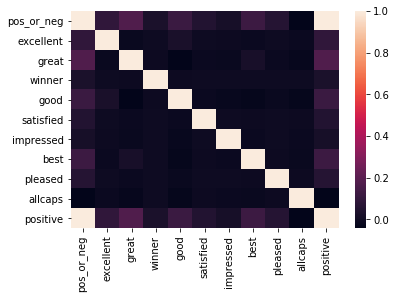

In [6]:
sns.heatmap(sms_raw.corr())

In [7]:
data = sms_raw[keywords + ['allcaps']]
print(data.head())
target = sms_raw['positive']
print(target.head())

   excellent  great  winner   good  satisfied  impressed   best  pleased  \
0      False  False   False  False      False      False  False    False   
1       True  False   False  False      False      False  False    False   
2      False  False   False  False      False      False  False    False   
3      False  False   False  False      False      False  False    False   
4      False  False   False  False      False      False  False    False   

   allcaps  
0    False  
1    False  
2    False  
3    False  
4    False  
0    False
1     True
2     True
3    False
4     True
Name: positive, dtype: bool


In [8]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

print(bnb)

# Fit our model to the data.
# bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.fit(data, target).predict(data)

print(y_pred[:10])
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target == y_pred).sum()
))

print('success rate = %s' % ((data.shape[0] - (target != y_pred).sum())/data.shape[0]))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
[False  True False False False False False False False False]
Number of mislabeled points out of a total 1000 points : 588
success rate = 0.588


# Now to Increase My Success Rate!

Strategy 1: Lowercase message

In [12]:
sms_raw2 = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)

sms_raw2.columns = ['message', 'pos_or_neg']
print(sms_raw2.head())

sms_raw2['lower_message'] = " " + sms_raw2.message.str.lower() + " "
print(sms_raw2.head())

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw2[str(key)] = sms_raw2.lower_message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
print(sms_raw2.head())

                                             message  pos_or_neg
0  So there is no way for me to plug it in here i...           0
1                        Good case, Excellent value.           1
2                             Great for the jawbone.           1
3  Tied to charger for conversations lasting more...           0
4                                  The mic is great.           1
                                             message  pos_or_neg  \
0  So there is no way for me to plug it in here i...           0   
1                        Good case, Excellent value.           1   
2                             Great for the jawbone.           1   
3  Tied to charger for conversations lasting more...           0   
4                                  The mic is great.           1   

                                       lower_message  
0   so there is no way for me to plug it in here ...  
1                       good case, excellent value.   
2                            great f

In [13]:
sms_raw2['positive'] = (sms_raw2['pos_or_neg'] == 1)
sms_raw2['allcaps'] = sms_raw2.message.str.isupper()
print(sms_raw2.head())

data2 = sms_raw2[keywords + ['allcaps']]

target2 = sms_raw2['positive']


y_pred2 = bnb.fit(data2, target2).predict(data2)

print(y_pred[:10])
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 == y_pred2).sum()
))

print('success rate = %s' % ((data2.shape[0] - (target2 != y_pred2).sum())/data2.shape[0]))

                                             message  pos_or_neg  \
0  So there is no way for me to plug it in here i...           0   
1                        Good case, Excellent value.           1   
2                             Great for the jawbone.           1   
3  Tied to charger for conversations lasting more...           0   
4                                  The mic is great.           1   

                                       lower_message  excellent  great  \
0   so there is no way for me to plug it in here ...      False  False   
1                       good case, excellent value.        True  False   
2                            great for the jawbone.       False   True   
3   tied to charger for conversations lasting mor...      False  False   
4                                 the mic is great.       False  False   

   winner   good  satisfied  impressed   best  pleased  positive  allcaps  
0   False  False      False      False  False    False     False    Fa